In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt 
from IPython.display import Markdown as md

In [2]:
data = pd.read_csv('Features_Zipcode_Final.csv')

In [3]:
data.head()

,ZIPCODE,TOTAL STREET LENGTH,TOTAL BIKE LANE LENGTH,BIKE LANE DENSITY,NUM_DOCKS_AVAILABLE,TRIPS,NORMALIZED ACCIDENT COUNT,WHITE_POP %,POPULATION,ACCIDENT COUNT,MEAN INCOME
0,11436,NaN,NaN,NaN,NaN,8192.653036,0.378388,7.031032,17949.0,31.0,29271.0
1,11213,146367.805288,28632.146155,0.195618,NaN,780.000000,45.128205,28.880142,63767.0,352.0,29216.0
2,11212,215912.786687,40575.901547,0.187927,NaN,87326.231788,0.381329,11.172781,84500.0,333.0,20958.0
3,11225,114141.251961,26079.822125,0.228487,149.0,6879.000000,4.564617,31.436415,56829.0,314.0,38992.0
4,11218,208355.389994,24186.845000,0.116085,23.0,1186.000000,28.667791,62.269343,75220.0,340.0,36189.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ZIPCODE                    248 non-null    int64  
 1   TOTAL STREET LENGTH        178 non-null    float64
 2   TOTAL BIKE LANE LENGTH     178 non-null    float64
 3   BIKE LANE DENSITY          178 non-null    float64
 4   NUM_DOCKS_AVAILABLE        54 non-null     float64
 5   TRIPS                      248 non-null    float64
 6   NORMALIZED ACCIDENT COUNT  248 non-null    float64
 7   WHITE_POP %                209 non-null    float64
 8   POPULATION                 209 non-null    float64
 9   ACCIDENT COUNT             248 non-null    float64
 10  MEAN INCOME                183 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 21.4 KB


In [5]:
data.shape

(248, 11)

In [6]:
mean = data[['BIKE LANE DENSITY']].dropna().mean()

data1 = data[['ZIPCODE','BIKE LANE DENSITY','NORMALIZED ACCIDENT COUNT']].set_index('ZIPCODE',drop=True).dropna()
data1.columns = data1.columns.str.replace(' ', '_')
data1.shape

(178, 2)

In [7]:
data1.describe()

,BIKE_LANE_DENSITY,NORMALIZED_ACCIDENT_COUNT
count,178.000000,178.000000
mean,0.176869,5.509394
std,0.132892,24.134541
min,0.000243,0.000000
25%,0.073142,0.375112
50%,0.156311,0.400976
75%,0.252600,1.141723
max,0.574144,260.621762


In [8]:
perc = 0.95

qhi = data1['NORMALIZED_ACCIDENT_COUNT'].quantile(perc)
qlow = data1['NORMALIZED_ACCIDENT_COUNT'].quantile(1-perc)

data1 = data1[(data1['NORMALIZED_ACCIDENT_COUNT'] >= qlow) & (data1['NORMALIZED_ACCIDENT_COUNT'] <= qhi)].reset_index(drop=True)

In [9]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

#data1['NORMALIZED_ACCIDENT_COUNT'] = scaler.fit_transform(np.array(data1['NORMALIZED_ACCIDENT_COUNT']).reshape(-1, 1)) 


base = 10

data1['Log_NORMALIZED_ACCIDENT_COUNT'] = np.log(np.array(data1['NORMALIZED_ACCIDENT_COUNT'])+1e-1)/np.log(base)
data1['Log_BIKE_LANE_DENSITY'] = np.log(np.array(data1['BIKE_LANE_DENSITY'])+1e-9)/np.log(base)


root = 3.5
data1['Root_NORMALIZED_ACCIDENT_COUNT'] = np.power((np.array(data1['NORMALIZED_ACCIDENT_COUNT'])),1/root)
data1['Root_BIKE_LANE_DENSITY'] = np.power((np.array(data1['BIKE_LANE_DENSITY'])),1/root)

data1['LR_NORMALIZED_ACCIDENT_COUNT'] = np.log(np.array(data1['Root_NORMALIZED_ACCIDENT_COUNT'])+1e-1)/np.log(base)
data1['LR_BIKE_LANE_DENSITY'] = np.log(np.array(data1['Root_BIKE_LANE_DENSITY'])+1e-9)/np.log(base)

In [10]:
data1.head()

,BIKE_LANE_DENSITY,NORMALIZED_ACCIDENT_COUNT,Log_NORMALIZED_ACCIDENT_COUNT,Log_BIKE_LANE_DENSITY,Root_NORMALIZED_ACCIDENT_COUNT,Root_BIKE_LANE_DENSITY,LR_NORMALIZED_ACCIDENT_COUNT,LR_BIKE_LANE_DENSITY
0,0.187927,0.381329,-0.317558,-0.726010,0.759226,0.620252,-0.065892,-0.207431
1,0.228487,4.564617,0.668816,-0.641138,1.543125,0.655870,0.215671,-0.183182
2,0.080448,0.375178,-0.323144,-1.094484,0.755707,0.486733,-0.067675,-0.312710
3,0.075781,0.369500,-0.328364,-1.120440,0.752422,0.478492,-0.069345,-0.320126
4,0.067137,0.366497,-0.331151,-1.173041,0.750670,0.462216,-0.070239,-0.335155


In [11]:
data1.describe()

,BIKE_LANE_DENSITY,NORMALIZED_ACCIDENT_COUNT,Log_NORMALIZED_ACCIDENT_COUNT,Log_BIKE_LANE_DENSITY,Root_NORMALIZED_ACCIDENT_COUNT,Root_BIKE_LANE_DENSITY,LR_NORMALIZED_ACCIDENT_COUNT,LR_BIKE_LANE_DENSITY
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.168451,1.842764,-0.074438,-0.972416,0.962099,0.556141,0.003315,-0.277833
std,0.127503,3.679156,0.460212,0.554453,0.402740,0.154432,0.130975,0.158415
min,0.000243,0.187014,-0.542096,-3.614273,0.619390,0.092758,-0.143035,-1.032650
25%,0.067154,0.378402,-0.320207,-1.172931,0.757557,0.462250,-0.066737,-0.335123
50%,0.146042,0.400976,-0.300184,-0.835522,0.770203,0.577138,-0.060380,-0.238721
75%,0.245186,0.838912,-0.027476,-0.610506,0.950997,0.669222,0.021593,-0.174430
max,0.540497,25.983760,1.416370,-0.267207,2.536300,0.838794,0.420995,-0.076345


In [12]:
data1.shape

(160, 8)

In [13]:
lm = smf.ols(formula='Root_NORMALIZED_ACCIDENT_COUNT~Log_BIKE_LANE_DENSITY-1',data=data1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     Root_NORMALIZED_ACCIDENT_COUNT   R-squared (uncentered):                   0.574
Model:                                        OLS   Adj. R-squared (uncentered):              0.571
Method:                             Least Squares   F-statistic:                              213.9
Date:                            Fri, 09 Dec 2022   Prob (F-statistic):                    3.11e-31
Time:                                    23:33:51   Log-Likelihood:                         -165.51
No. Observations:                             160   AIC:                                      333.0
Df Residuals:                                 159   BIC:                                      336.1
Df Model:                                       1                                                  
Covariance Type:                        nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Log_BIKE_LANE_DENSITY    -0.7059      0.048    -14.624      0.000      -0.801      -0.611
==============================================================================
Omnibus:                        6.341   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.042   Jarque-Bera (JB):               10.408
Skew:                           0.029   Prob(JB):                      0.00550
Kurtosis:                       4.248   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
md("<b>The p-value is {:.2f} and the rsquared is {:.2f}".format(lm.pvalues[0],lm.rsquared))

<b>The p-value is 0.00 and the rsquared is 0.57

Let us plot and see the result

<AxesSubplot:xlabel='Log_BIKE_LANE_DENSITY', ylabel='Root_NORMALIZED_ACCIDENT_COUNT'>

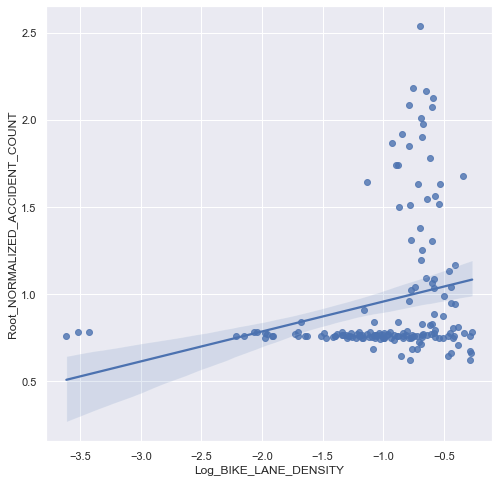

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
sns.regplot(x='Log_BIKE_LANE_DENSITY', y='Root_NORMALIZED_ACCIDENT_COUNT',data=data1)

In [16]:
md("$$Normalized Accident Count= ({}*log(Bike Lane Density))^{}$$".format(lm.params[0],root))

$$Normalized Accident Count= (-0.7058691218415555*log(Bike Lane Density))^3.5$$

In our range from 0 to 1 for bike lane density, this would mean that as bike lane density increases, the Normalized Accident count decreases rapidly.

In [17]:
x_mesh = np.linspace(np.min(data1['BIKE_LANE_DENSITY']),np.max(data1['BIKE_LANE_DENSITY']),100)
y_mesh = np.power(lm.params[0]*np.log(x_mesh)/np.log(base),root)

Text(0, 0.5, 'Normalized Accident Count')

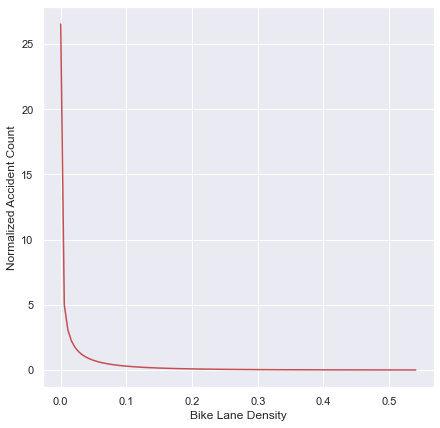

In [18]:
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(x_mesh,y_mesh,'-r')
plt.xlabel('Bike Lane Density')
plt.ylabel('Normalized Accident Count')